### 1. Load the CSV into a DataFrame.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

try:
    df = pd.read_csv('retail_sales_1000_rows.csv')
    print('Loaded, shape:', df.shape)
except Exception as e:
    print('orders.csv not found, using previously created sample dataframe with shape:', df.shape)
df.head()

Loaded, shape: (1000, 12)


,order_id,order_date,customer_id,gender,age,city,product,category,quantity,price,discount,payment_method
0,1001,2024-03-29,C072,M,38,Kolkata,Fan,Home Appliance,3,1160,7,Debit Card
1,1002,2025-01-12,C150,M,19,Hyderabad,Iron,Home Appliance,4,44431,7,Cash
2,1003,2025-07-02,C161,F,39,Ahmedabad,Jeans,Apparel,4,5611,12,Credit Card
3,1004,2025-02-04,C271,F,64,Bengaluru,Iron,Home Appliance,4,18731,10,Cash
4,1005,2025-02-01,C135,M,26,Kolkata,Fan,Home Appliance,1,31851,7,Debit Card


### 2. Display the first 10 rows.

In [8]:
# 2. Display the first 10 rows
df.head(10)

,order_id,order_date,customer_id,gender,age,city,product,category,quantity,price,discount,payment_method
0,1001,2024-03-29,C072,M,38,Kolkata,Fan,Home Appliance,3,1160,7,Debit Card
1,1002,2025-01-12,C150,M,19,Hyderabad,Iron,Home Appliance,4,44431,7,Cash
2,1003,2025-07-02,C161,F,39,Ahmedabad,Jeans,Apparel,4,5611,12,Credit Card
3,1004,2025-02-04,C271,F,64,Bengaluru,Iron,Home Appliance,4,18731,10,Cash
4,1005,2025-02-01,C135,M,26,Kolkata,Fan,Home Appliance,1,31851,7,Debit Card
5,1006,2023-11-29,C053,F,37,Kolkata,Shoes,Footwear,2,74269,0,Cash
6,1007,2025-04-30,C002,F,23,Jaipur,Smartwatch,Electronics,4,36220,5,Debit Card
7,1008,2024-01-17,C218,F,51,Pune,Sandals,Footwear,3,9992,5,Cash
8,1009,2025-01-06,C053,F,43,Ahmedabad,Tablet,Electronics,1,23547,5,Cash
9,1010,2025-04-25,C065,M,24,Ahmedabad,Boots,Footwear,3,38344,12,Credit Card


### 3. Show summary statistics for numerical columns.

In [9]:
# 3. Summary statistics for numerical columns
df.select_dtypes(include=[np.number]).describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1000.0,1500.500,288.819436,1001.0,1250.75,1500.5,1750.25,2000.0
age,1000.0,41.169,13.671699,18.0,29.00,42.0,53.00,64.0
quantity,1000.0,2.417,1.119090,1.0,1.00,2.0,3.00,4.0
price,1000.0,38918.214,23018.543158,366.0,19542.00,36596.0,58775.00,79975.0
discount,1000.0,8.171,4.838923,0.0,5.00,7.0,12.00,15.0


### 4. Find the shape of the dataset (rows, columns).

In [10]:
# 4. Shape of dataset
df.shape

(1000, 12)

### 5. Display column names and data types.

In [11]:
# 5. Column names and dtypes
df.dtypes

order_id           int64
order_date        object
customer_id       object
gender            object
age                int64
city              object
product           object
category          object
quantity           int64
price              int64
discount           int64
payment_method    object
dtype: object

### 6. Check number of missing values in each column.

In [12]:
# 6. Missing values per column
df.isna().sum()

order_id          0
order_date        0
customer_id       0
gender            0
age               0
city              0
product           0
category          0
quantity          0
price             0
discount          0
payment_method    0
dtype: int64

### 7. Convert `order_date` into datetime format.

In [13]:
# 7. Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['order_date'].dtype

dtype('<M8[ns]')

### 8. Drop rows where `quantity` or `price` is missing.

In [14]:
# 8. Drop rows where quantity or price is missing
before = len(df)
df = df.dropna(subset=['quantity','price'])
after = len(df)
print(f'Dropped {before-after} rows. New shape: {df.shape}')

Dropped 0 rows. New shape: (1000, 12)


### 9. Fill missing `city` values with "Unknown".

In [15]:
# 9. Fill missing city values with 'Unknown'
df['city'] = df['city'].fillna('Unknown')
df['city'].isna().sum()

0

### 10. Replace blank or null in `gender` with "Not Specified".

In [16]:
# 10. Replace blank or null in gender with 'Not Specified'
df['gender'] = df['gender'].replace('', np.nan)
df['gender'] = df['gender'].fillna('Not Specified')
df['gender'].unique()

array(['M', 'F'], dtype=object)

### 11. Remove duplicate rows.

In [17]:
# 11. Remove duplicate rows
before = len(df)
df = df.drop_duplicates()
after = len(df)
print('Dropped duplicates:', before-after)

Dropped duplicates: 0


### 12. Fix inconsistent city names (e.g., “Bangalore” vs “Bengaluru”).

In [18]:
# 12. Normalize city names (common examples)
mapping = {'Bangalore':'Bengaluru', 'bangalore':'Bengaluru', 'Bengaluru':'Bengaluru',"Bombay": "Mumbai", "Delhi NCR": "Delhi", "Madras": "Chennai"}
df['city'] = df['city'].replace(mapping)
df['city'].unique()

array(['Kolkata', 'Hyderabad', 'Ahmedabad', 'Bengaluru', 'Jaipur', 'Pune',
       'Mumbai', 'Chennai', 'Delhi'], dtype=object)

### 13. Create a new column `total_amount = quantity * price`.

In [19]:
# 13. total_amount = quantity * price
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce').fillna(0).astype(int)
df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0)
df['total_amount'] = df['quantity'] * df['price']
df[['order_id','quantity','price','total_amount']].head()

,order_id,quantity,price,total_amount
0,1001,3,1160,3480
1,1002,4,44431,177724
2,1003,4,5611,22444
3,1004,4,18731,74924
4,1005,1,31851,31851


### 14. Create a new column `discount_amount = price * discount / 100`.

In [20]:
# 14. discount_amount = price * discount / 100
df['discount'] = pd.to_numeric(df['discount'], errors='coerce').fillna(0)
df['discount_amount'] = df['price'] * df['discount'] / 100.0
df[['price','discount','discount_amount']].head()

,price,discount,discount_amount
0,1160,7,81.20
1,44431,7,3110.17
2,5611,12,673.32
3,18731,10,1873.10
4,31851,7,2229.57


### 15. Create a new column `final_price = price - discount_amount`.

In [21]:
# 15. final_price = price - discount_amount
df['final_price'] = df['price'] - df['discount_amount']
df[['price','discount_amount','final_price']].head()

,price,discount_amount,final_price
0,1160,81.20,1078.80
1,44431,3110.17,41320.83
2,5611,673.32,4937.68
3,18731,1873.10,16857.90
4,31851,2229.57,29621.43


### 16. Extract year, month, day from `order_date`.

In [22]:
# 16. Extract year, month, day
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_day'] = df['order_date'].dt.day
df[['order_date','order_year','order_month','order_day']].head()

,order_date,order_year,order_month,order_day
0,2024-03-29,2024,3,29
1,2025-01-12,2025,1,12
2,2025-07-02,2025,7,2
3,2025-02-04,2025,2,4
4,2025-02-01,2025,2,1


### 17. Create an “age group” column (20–30, 30–40, 40–50).

In [23]:
# 17. Age group column
bins = [0,20,30,40,50,200]
labels = ['<20','20-30','30-40','40-50','50+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df[['age','age_group']].head(10)

,age,age_group
0,38,30-40
1,19,<20
2,39,30-40
3,64,50+
4,26,20-30
5,37,30-40
6,23,20-30
7,51,50+
8,43,40-50
9,24,20-30


### 18. Flag high-value customers (`total_amount > 50000`).

In [24]:
# 18. Flag high-value orders (total_amount > 50000)
df['high_value'] = df['total_amount'] > 50000
df[['order_id','total_amount','high_value']].head()

,order_id,total_amount,high_value
0,1001,3480,False
1,1002,177724,True
2,1003,22444,False
3,1004,74924,True
4,1005,31851,False


### 19. Count how many customers are from each city.

In [25]:
# 19. Count customers from each city (by unique customer_id)
city_counts = df.groupby('city')['customer_id'].nunique().sort_values(ascending=False).rename('unique_customers')
city_counts

city
Bengaluru    107
Hyderabad     98
Ahmedabad     96
Jaipur        96
Delhi         95
Pune          92
Kolkata       91
Chennai       87
Mumbai        84
Name: unique_customers, dtype: int64

### 20. Find the most popular product category.

In [26]:
# 20. Most popular product category (by number of orders)
cat_counts = df['category'].value_counts()
cat_counts

Electronics       256
Apparel           254
Home Appliance    250
Footwear          240
Name: category, dtype: int64

### 21. Find the average age of customers.

In [27]:
# 21. Average age of customers (mean of age column)
df['age'].mean()

41.169

### 22. Find min, max, average price of all products.

In [28]:
# 22. Min, max, average price
df['price'].agg(['min','max','mean']).rename({'mean':'avg_price'})

min            366.000
max          79975.000
avg_price    38918.214
Name: price, dtype: float64

### 23. Compare average spending by gender.

In [29]:
# 23. Compare average spending by gender (use total_amount or final_price * quantity)
gender_spend = df.groupby('gender').agg(total_spend=('total_amount','sum'), avg_spend=('total_amount','mean'), orders=('order_id','count'))
gender_spend

,total_spend,avg_spend,orders
gender,,,
F,44515484,92934.204593,479
M,49862389,95705.161228,521


### 24. Compare quantity purchased across product categories.

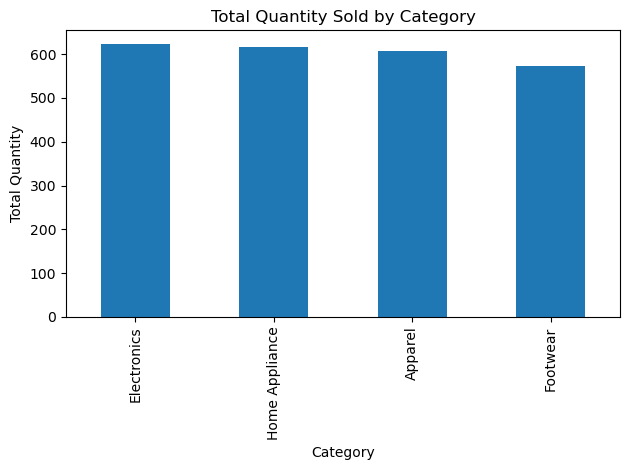

In [30]:
# 24. Quantity purchased across categories
qty_by_cat = df.groupby('category')['quantity'].sum().sort_values(ascending=False)
qty_by_cat

# Visualization
plt.figure()
qty_by_cat.plot(kind='bar')
plt.title('Total Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

### 25. Find which city spends the most total amount.

In [31]:
# 25. City that spends the most (by total_amount)
city_spend = df.groupby('city')['total_amount'].sum().sort_values(ascending=False)
city_spend

city
Ahmedabad    12077298
Hyderabad    11256115
Pune         10619921
Mumbai       10572150
Chennai      10487616
Bengaluru    10145967
Jaipur        9991705
Kolkata       9616036
Delhi         9611065
Name: total_amount, dtype: int64

### 26. Compare discount distribution for electronics vs apparel.

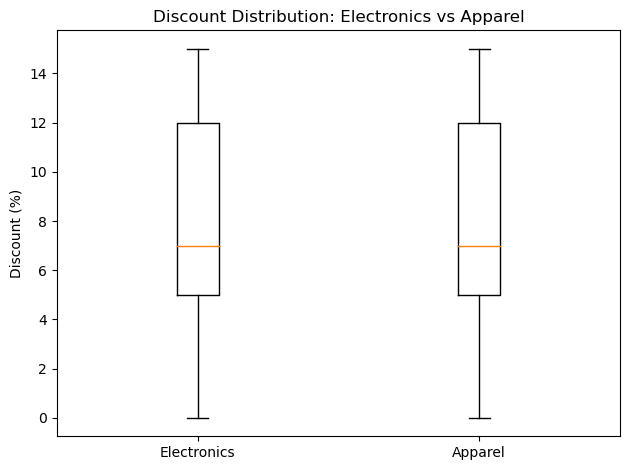

In [32]:
# 26. Discount distribution: Electronics vs Apparel
elec = df[df['category']=='Electronics']['discount']
app = df[df['category']=='Apparel']['discount']

# Basic stats
pd.DataFrame({'Electronics': elec.describe(), 'Apparel': app.describe()})

# Visualization - boxplots using matplotlib (each plot in its own figure as required)
plt.figure()
plt.boxplot([elec.dropna().values, app.dropna().values], labels=['Electronics','Apparel'])
plt.title('Discount Distribution: Electronics vs Apparel')
plt.ylabel('Discount (%)')
plt.tight_layout()
plt.show()

### 27. Check correlation between age and spending.

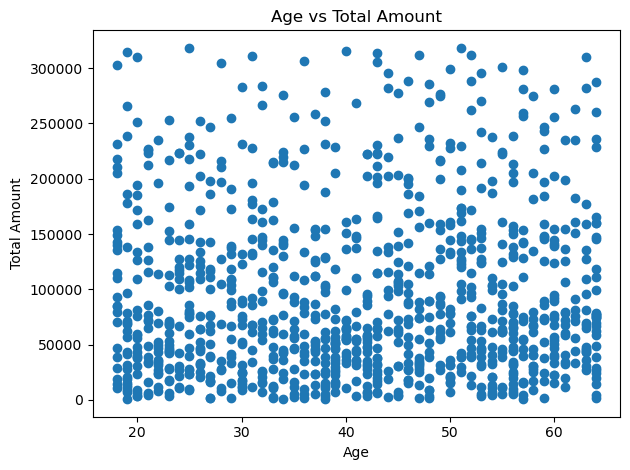

In [33]:
# 27. Correlation between age and spending
# We'll define spending as total_amount per order
corr = df[['age','total_amount']].corr().loc['age','total_amount']
corr

# Scatter plot
plt.figure()
plt.scatter(df['age'], df['total_amount'])
plt.title('Age vs Total Amount')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

### 28. Total revenue per category.

In [34]:
# 28. Total revenue per category (using total_amount)
rev_cat = df.groupby('category')['total_amount'].sum().sort_values(ascending=False)
rev_cat

category
Electronics       24277744
Apparel           23825411
Footwear          23562062
Home Appliance    22712656
Name: total_amount, dtype: int64

### 29. Total revenue per city.

In [35]:
# 29. Total revenue per city
rev_city = df.groupby('city')['total_amount'].sum().sort_values(ascending=False)
rev_city

city
Ahmedabad    12077298
Hyderabad    11256115
Pune         10619921
Mumbai       10572150
Chennai      10487616
Bengaluru    10145967
Jaipur        9991705
Kolkata       9616036
Delhi         9611065
Name: total_amount, dtype: int64

### 30. Average order value per customer.

In [36]:
# 30. Average order value per customer
aov = df.groupby('customer_id').agg(total_spend=('total_amount','sum'), orders=('order_id','count'))
aov['avg_order_value'] = aov['total_spend'] / aov['orders']
aov.sort_values('avg_order_value', ascending=False).head()

,total_spend,orders,avg_order_value
customer_id,,,
C136,288780,1,288780.0
C234,532600,2,266300.0
C242,263380,1,263380.0
C027,728199,3,242733.0
C014,202912,1,202912.0


### 31. Revenue per payment method.

In [37]:
# 31. Revenue per payment method
rev_pm = df.groupby('payment_method')['total_amount'].sum().sort_values(ascending=False)
rev_pm

payment_method
Cash           21809458
Debit Card     20137321
EMI            19969880
Credit Card    16377088
UPI            16084126
Name: total_amount, dtype: int64

### 32. Count of orders per day.

In [38]:
# 32. Count of orders per day
orders_per_day = df.groupby('order_date').size().rename('orders_count').sort_index()
orders_per_day

order_date
2023-11-16    1
2023-11-17    3
2023-11-19    1
2023-11-20    2
2023-11-21    3
             ..
2025-11-09    5
2025-11-11    2
2025-11-13    4
2025-11-14    1
2025-11-15    4
Name: orders_count, Length: 542, dtype: int64

### 33. Total items sold per category.

In [39]:
# 33. Total items sold per category
items_cat = df.groupby('category')['quantity'].sum().sort_values(ascending=False)
items_cat

category
Electronics       623
Home Appliance    615
Apparel           606
Footwear          573
Name: quantity, dtype: int64

### 34. Find daily total revenue.

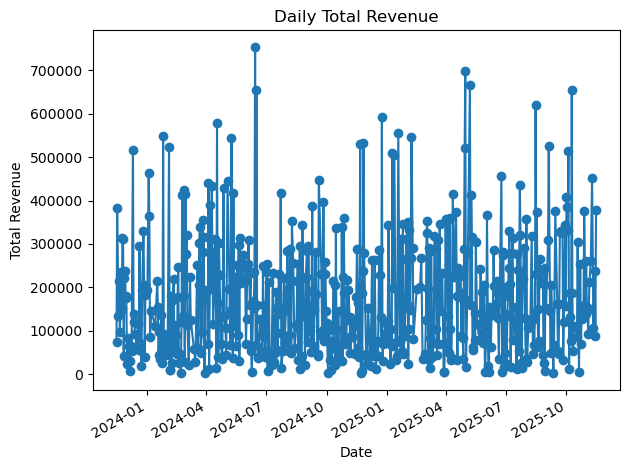

In [40]:
# 34. Daily total revenue
daily_rev = df.groupby('order_date')['total_amount'].sum().sort_index()
daily_rev

# Visualization
plt.figure()
daily_rev.plot(marker='o')
plt.title('Daily Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

### 35. Find weekly total revenue.

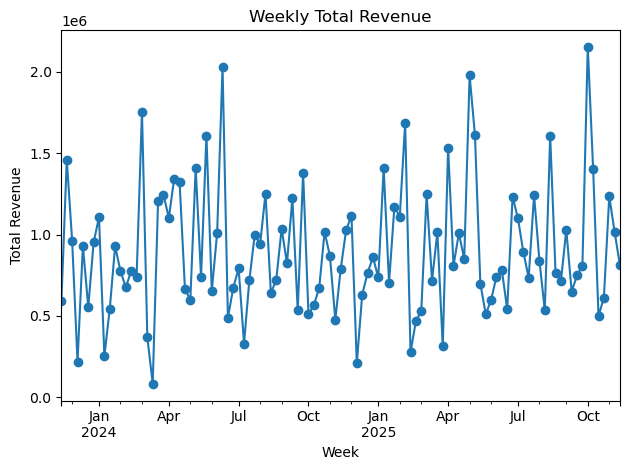

In [41]:
# 35. Weekly total revenue (resample week on order_date)
weekly = df.set_index('order_date').resample('W')['total_amount'].sum()
weekly

# Visualization
plt.figure()
weekly.plot(marker='o')
plt.title('Weekly Total Revenue')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

### 36. Find monthly order count.

In [42]:
# 36. Monthly order count
monthly_orders = df.set_index('order_date').resample('M').size().rename('order_count')
monthly_orders

order_date
2023-11-30    27
2023-12-31    39
2024-01-31    33
2024-02-29    47
2024-03-31    41
2024-04-30    46
2024-05-31    37
2024-06-30    46
2024-07-31    35
2024-08-31    43
2024-09-30    44
2024-10-31    49
2024-11-30    35
2024-12-31    39
2025-01-31    47
2025-02-28    31
2025-03-31    43
2025-04-30    48
2025-05-31    36
2025-06-30    38
2025-07-31    45
2025-08-31    41
2025-09-30    38
2025-10-31    48
2025-11-30    24
Freq: M, Name: order_count, dtype: int64

### 37. Identify highest revenue day of the month.

In [43]:
# 37. Highest revenue day of the month (for each month)
monthly_high = df.groupby(pd.Grouper(key='order_date', freq='M'))['total_amount'].idxmax().dropna().tolist()
# idxmax gives order_date index of highest order; we'll show day with highest daily revenue instead:
daily_rev = df.groupby('order_date')['total_amount'].sum()
highest_day = daily_rev.idxmax()
highest_day, daily_rev.max()

(Timestamp('2024-06-14 00:00:00'), 754615)

### 38. Find top 5 customers by total spending.

In [44]:
# 38. Top 5 customers by total spending
top5 = df.groupby('customer_id')['total_amount'].sum().sort_values(ascending=False).head(5)
top5

customer_id
C047    1137092
C214    1102045
C117    1094889
C288    1014329
C012     912021
Name: total_amount, dtype: int64

### 39. Find customers who purchased electronics more than once.

In [45]:
# 39. Customers who purchased Electronics more than once
elec_purchases = df[df['category']=='Electronics'].groupby('customer_id').size()
elec_repeat = elec_purchases[elec_purchases>1].index.tolist()
elec_purchases, elec_repeat

(customer_id
 C002    1
 C003    1
 C004    1
 C005    1
 C007    1
        ..
 C288    3
 C289    1
 C292    1
 C295    1
 C296    1
 Length: 173, dtype: int64,
 ['C012',
  'C013',
  'C024',
  'C026',
  'C027',
  'C029',
  'C032',
  'C035',
  'C039',
  'C040',
  'C043',
  'C046',
  'C049',
  'C055',
  'C062',
  'C064',
  'C065',
  'C069',
  'C070',
  'C074',
  'C082',
  'C084',
  'C090',
  'C095',
  'C103',
  'C104',
  'C111',
  'C112',
  'C113',
  'C115',
  'C116',
  'C117',
  'C120',
  'C122',
  'C126',
  'C132',
  'C137',
  'C142',
  'C144',
  'C146',
  'C160',
  'C168',
  'C169',
  'C170',
  'C175',
  'C185',
  'C186',
  'C188',
  'C190',
  'C192',
  'C200',
  'C205',
  'C206',
  'C207',
  'C208',
  'C216',
  'C220',
  'C222',
  'C226',
  'C256',
  'C277',
  'C288'])

### 40. Find unique product categories purchased by each customer.

In [46]:
# 40. Unique product categories purchased by each customer
cust_cats = df.groupby('customer_id')['category'].unique().apply(list)
cust_cats.head()

customer_id
C001                 [Apparel, Home Appliance, Footwear]
C002                             [Electronics, Footwear]
C003    [Apparel, Home Appliance, Footwear, Electronics]
C004    [Footwear, Home Appliance, Electronics, Apparel]
C005    [Apparel, Home Appliance, Electronics, Footwear]
Name: category, dtype: object

### 41. Identify repeat customers (more than 3 orders).

In [47]:
# 41. Repeat customers with more than 3 orders
orders_count = df.groupby('customer_id').size()
repeat_customers = orders_count[orders_count>3]
repeat_customers

customer_id
C003    4
C004    4
C005    4
C007    6
C012    5
       ..
C288    6
C289    6
C290    4
C291    4
C295    4
Length: 123, dtype: int64

### 42. Find outliers in price using IQR.

In [48]:
# 42. Outliers in price using IQR method
prices = df['price'].dropna()
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df['price'] < lower) | (df['price'] > upper)]
print('IQR bounds:', lower, upper)
outliers[['order_id','product','price']]

IQR bounds: -39307.5 117624.5


,order_id,product,price


### 43. Create pivot table: category vs gender → total revenue.

In [49]:
# 43. Pivot table: category vs gender -> total revenue
pivot = pd.pivot_table(df, values='total_amount', index='category', columns='gender', aggfunc='sum', fill_value=0)
pivot

gender,F,M
category,,
Apparel,10810698,13014713
Electronics,11525949,12751795
Footwear,11527206,12034856
Home Appliance,10651631,12061025


### 44. Use `.query()` to filter orders with category = Electronics, discount > 5, final_price > 2000.

In [50]:
# 44. Using .query() for the requested filter
filtered = df.query("category == 'Electronics' and discount > 5 and final_price > 2000")
filtered

,order_id,order_date,customer_id,gender,age,city,product,category,quantity,price,discount,payment_method,total_amount,discount_amount,final_price,order_year,order_month,order_day,age_group,high_value
14,1015,2025-08-01,C063,F,56,Mumbai,Laptop,Electronics,1,23719,7,Cash,23719,1660.33,22058.67,2025,8,1,50+,False
15,1016,2024-08-08,C143,M,46,Pune,Headphones,Electronics,1,18441,12,EMI,18441,2212.92,16228.08,2024,8,8,40-50,False
19,1020,2025-08-12,C160,F,41,Ahmedabad,Tablet,Electronics,4,13845,7,Cash,55380,969.15,12875.85,2025,8,12,40-50,True
20,1021,2025-07-06,C295,F,20,Mumbai,iPhone 13,Electronics,4,39653,10,EMI,158612,3965.30,35687.70,2025,7,6,20-30,True
22,1023,2024-04-04,C172,F,49,Jaipur,Smartwatch,Electronics,2,47017,12,Cash,94034,5642.04,41374.96,2024,4,4,40-50,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1981,2025-11-02,C225,M,23,Chennai,Laptop,Electronics,1,3562,10,Debit Card,3562,356.20,3205.80,2025,11,2,20-30,False
981,1982,2025-02-07,C245,M,25,Pune,Tablet,Electronics,2,50917,10,EMI,101834,5091.70,45825.30,2025,2,7,20-30,True
994,1995,2025-07-10,C090,M,56,Mumbai,Tablet,Electronics,2,32369,10,UPI,64738,3236.90,29132.10,2025,7,10,50+,True
995,1996,2025-02-03,C153,F,28,Kolkata,Smartwatch,Electronics,3,34929,12,Debit Card,104787,4191.48,30737.52,2025,2,3,20-30,True


### 45. Encode gender M/F into 0/1 mapping.

In [51]:
# 45. Encode gender M/F into 0/1
# We'll map 'M'->1, 'F'->0, others to NaN then fill with -1 for Not Specified
mapping = {'M':1, 'F':0}
df['gender_encoded'] = df['gender'].map(mapping).fillna(-1).astype(int)
df[['gender','gender_encoded']].drop_duplicates().head()

,gender,gender_encoded
0,M,1
2,F,0


### 46. Find which product has highest profit after discount.

In [52]:
# 46. Product with highest 'profit' after discount (interpreted as revenue after discount)
# NOTE: The dataset doesn't include cost, so we define 'profit after discount' here as revenue after discount = final_price * quantity.
df['revenue_after_discount'] = df['final_price'] * df['quantity']
prod_rev = df.groupby('product')['revenue_after_discount'].sum().sort_values(ascending=False)
prod_rev.head(1)

product
Sandals    6804933.08
Name: revenue_after_discount, dtype: float64